<a href="https://colab.research.google.com/github/Srishti013/Machine-Learning/blob/main/Supervised_learning/Decesion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.shape

(891, 9)

In [15]:
df = df.drop(['Cabin'],axis=1)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

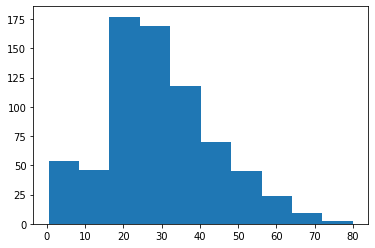

In [10]:
plt.hist(df['Age'])

In [39]:
df.Age = df['Age'].fillna(df['Age'].mean())

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [40]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
embark      0
sex         0
dtype: int64

In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df.Embarked = df.Embarked.fillna('S')
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [24]:
embark_le = LabelEncoder()
sex_le = LabelEncoder()

In [23]:
df['embark'] = embark_le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embark
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,2


In [25]:
df['sex'] = sex_le.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embark,sex
0,0,3,male,22.0,1,0,7.2500,S,2,1
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,0
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,2,1


In [27]:
df = df.drop(['Sex','Embarked'],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,embark,sex
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


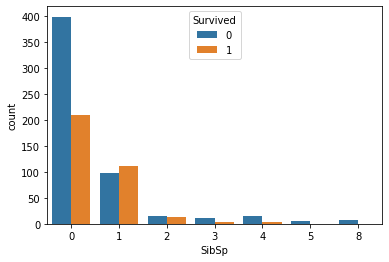

In [54]:
sns.countplot(x='SibSp',hue='Survived',data=df)

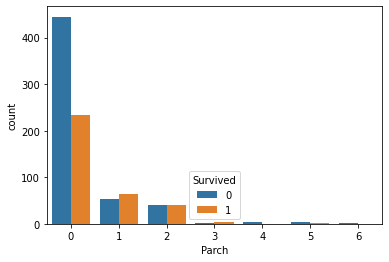

In [55]:
sns.countplot(x='Parch',hue='Survived',data=df)

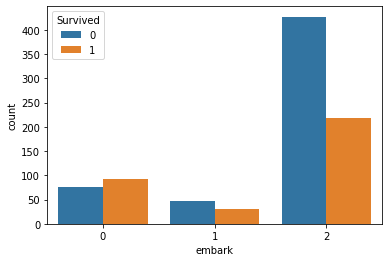

In [56]:
sns.countplot(x='embark',hue='Survived',data=df)

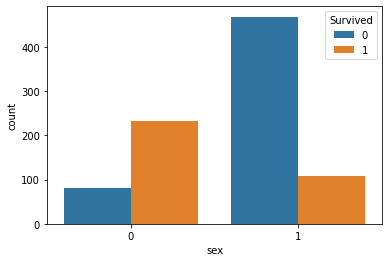

In [58]:
sns.countplot(x='sex',hue='Survived',data=df)

In [28]:
from sklearn import tree

In [31]:
model = tree.DecisionTreeClassifier()

In [49]:
X = df.drop(['Survived','SibSp','Parch','embark'],axis=1)
y = df.Survived

In [33]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [51]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
model.score(X_test,y_test)

0.8022388059701493